<a href="https://colab.research.google.com/github/Distifiaoktari/klp-9-project-apm-kelas-B/blob/main/Desicion_Tree_ID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd #for manipulating the csv data
import numpy as np #for mathematical calculation

In [15]:
data = pd.read_csv("sample_data/PlayTennis_1.csv") #importing the dataset from the disk
data.head() #viewing some row of the dataset

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
enc = LabelEncoder()

In [20]:
data['outlook'] = enc.fit_transform(data['outlook'].values)
data['temp'] = enc.fit_transform(data['temp'].values)
data['humidity'] = enc.fit_transform(data['humidity'].values)
data['windy'] = enc.fit_transform(data['windy'].values)
data['play'] = enc.fit_transform(data['play'].values)

In [21]:
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [22]:
data['temp'] = data['temp'].fillna(0)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_names = ['temp','humidity','windy']
features = data[feature_names]
data2 = data.play

In [24]:
x_train, x_test, y_train, y_test = train_test_split(features, data2, test_size=0.2, random_state=1)

In [25]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.3333333333333333


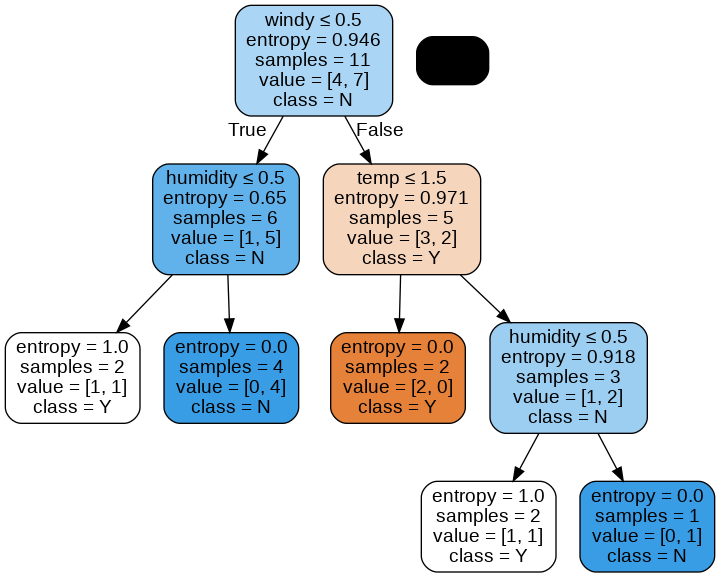

In [26]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(clf, out_file=None,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_names,
                class_names=["Y","N"])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('image.png')
Image(graph.create_png())